# __이미지 분류 모델 만들기__

## __0. 데이터 준비하기__

In [ ]:
%load_ext thanosql
%thanosql API_TOKEN={발급받은 개인 토큰}

In [2]:
%%thanosql
COPY cat_and_dog_train FROM "tutorial_data/cat_and_dog_data/cat_and_dog_train.csv"

Success


In [3]:
%%thanosql
COPY cat_and_dog_test FROM "tutorial_data/cat_and_dog_data/cat_and_dog_test.csv"

Success


## __1. 데이터 세트 확인__

본 튜토리얼을 진행하기 위해 우리는 ThanoSQL DB에 저장되어 있는  cat_and_dog_train 테이블을 사용합니다. 아래의 쿼리문을 실행하여 테이블 내용을 확인합니다.

In [4]:
%%thanosql
SELECT *
FROM cat_and_dog_train
LIMIT 5

,image,label
0,tutorial_data/cat_and_dog_data/cat_and_dog_tra...,cat
1,tutorial_data/cat_and_dog_data/cat_and_dog_tra...,cat
2,tutorial_data/cat_and_dog_data/cat_and_dog_tra...,cat
3,tutorial_data/cat_and_dog_data/cat_and_dog_tra...,cat
4,tutorial_data/cat_and_dog_data/cat_and_dog_tra...,cat


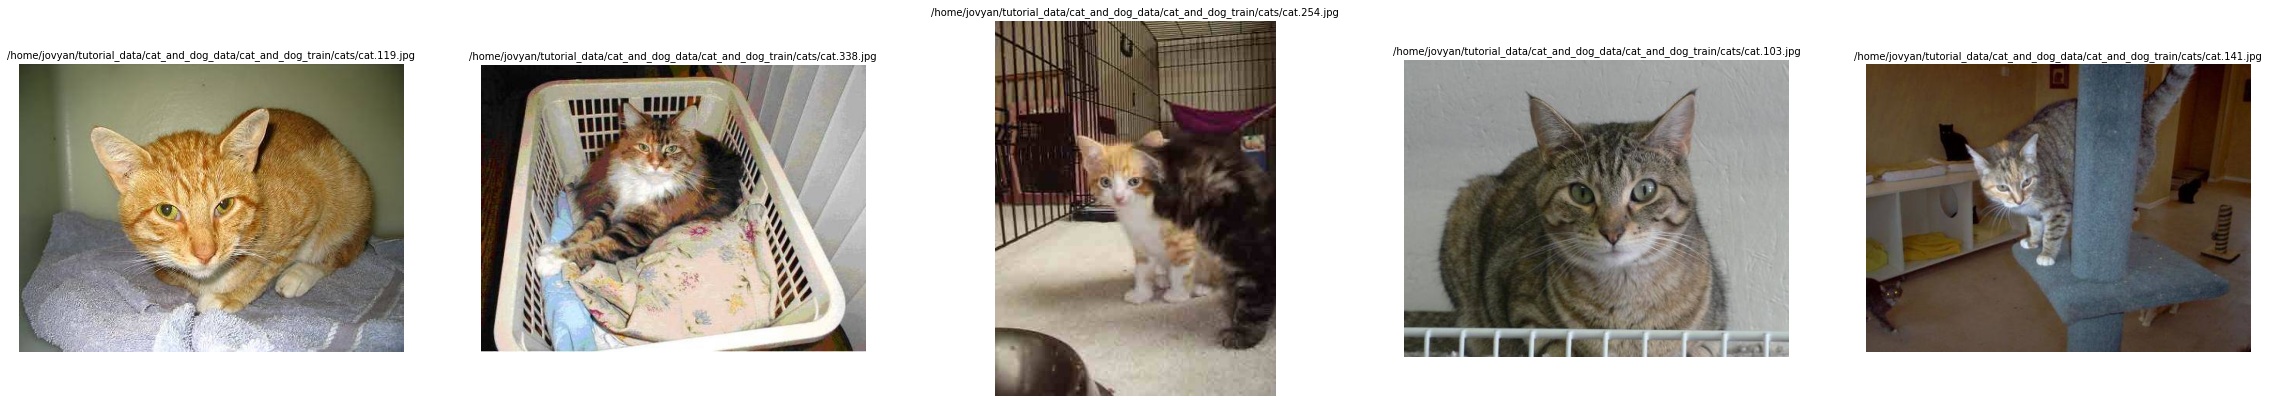

In [5]:
%%thanosql
PRINT IMAGE AS
SELECT image
FROM cat_and_dog_train
LIMIT 5

## __2. 사전 학습된 모델을 사용하여 강아지와 고양이 이미지 분류 결과 예측__

먼저 저희가 미리 준비해둔 모델로 바로 결과를 예측해보겠습니다. 다음 쿼리문을 실행하면, 사전에 학습을 해 둔 고양이, 개 이미지 분류모델, tutorial_image_classification 모델을 사용하여 결과를 예측해볼 수 있습니다.

In [6]:
%%thanosql
PREDICT USING tutorial_image_classification
AS
SELECT *
FROM cat_and_dog_test

,image,label,predicted
0,tutorial_data/cat_and_dog_data/cat_and_dog_tes...,cat,cat
1,tutorial_data/cat_and_dog_data/cat_and_dog_tes...,cat,cat
2,tutorial_data/cat_and_dog_data/cat_and_dog_tes...,cat,cat
3,tutorial_data/cat_and_dog_data/cat_and_dog_tes...,cat,cat
4,tutorial_data/cat_and_dog_data/cat_and_dog_tes...,cat,cat
...,...,...,...
195,tutorial_data/cat_and_dog_data/cat_and_dog_tes...,dog,dog
196,tutorial_data/cat_and_dog_data/cat_and_dog_tes...,dog,dog
197,tutorial_data/cat_and_dog_data/cat_and_dog_tes...,dog,dog
198,tutorial_data/cat_and_dog_data/cat_and_dog_tes...,dog,dog


## __3. 이미지 분류 모델 생성__

이전 단계에서 확인한 cat_and_dog_train 데이터 세트를 사용하여 이미지 분류 모델을 만듭니다. 아래의 쿼리 구문을 실행하여 my_image_classifier이라는 이름의 모델을 만듭니다.

In [7]:
%%thanosql
BUILD MODEL my_image_classifier
USING ConvNeXt_Tiny
OPTIONS (
    image_col='image',
    label_col='label',
    epochs=1
    )
AS
SELECT *
FROM cat_and_dog_train

Success


## __4. 생성된 모델을 사용하여 강아지와 고양이 이미지 분류 결과 예측__

이전 단계에서 만든 이미지 예측 모델 my_image_classifier을 사용해서 특정 이미지(학습에 이용되지 않은 데이터 테이블, cat_and_dog_test의 목표값을 예측해 봅니다.  아래 쿼리를 수행하고 나면, 예측 결과는 predicted 열에 저장되어 반환됩니다.

In [8]:
%%thanosql
PREDICT USING my_image_classifier
OPTIONS (image_col='image')
AS
SELECT *
FROM cat_and_dog_test

,image,label,predicted
0,tutorial_data/cat_and_dog_data/cat_and_dog_tes...,cat,cat
1,tutorial_data/cat_and_dog_data/cat_and_dog_tes...,cat,cat
2,tutorial_data/cat_and_dog_data/cat_and_dog_tes...,cat,cat
3,tutorial_data/cat_and_dog_data/cat_and_dog_tes...,cat,cat
4,tutorial_data/cat_and_dog_data/cat_and_dog_tes...,cat,cat
...,...,...,...
195,tutorial_data/cat_and_dog_data/cat_and_dog_tes...,dog,dog
196,tutorial_data/cat_and_dog_data/cat_and_dog_tes...,dog,dog
197,tutorial_data/cat_and_dog_data/cat_and_dog_tes...,dog,dog
198,tutorial_data/cat_and_dog_data/cat_and_dog_tes...,dog,dog
